# Symmetrical components

In [1]:
from IPython.display import IFrame, display

In [2]:
filepath="https://en.wikipedia.org/wiki/Symmetrical_components"
IFrame(filepath, width=600, height=500)

### Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#magnitude_A=float(input("Enter magnitude of phase A :"))
magnitude_A=100
#angle_A=float(input("Enter angle of phase A (degree) :"))
angle_A=0

#magnitude_B=float(input("Enter magnitude of phase B :"))
magnitude_B=35
#angle_B=float(input("Enter angle of phase B (degree) :"))
angle_B=-90

#magnitude_C=float(input("Enter magnitude of phase C :"))
magnitude_C=40
#angle_C=float(input("Enter angle of phase C (degree) :"))
angle_C=180
#phasor to cartesian conversion
def phasor2cart(r, theta):
    theta_rad=(np.pi/180)*theta
    return r*np.exp(1j*theta_rad)
# convert cartesian to phasor
def cart2phasor(z):
    return (np.abs(z), (180/np.pi)*np.angle(z))

a=phasor2cart(1,120)

A=np.array([[1, 1, 1], [1, a**2, a], [1, a, a**2]])

unbalanced=np.array([phasor2cart(magnitude_A, angle_A), 
                    phasor2cart(magnitude_B, angle_B), 
                    phasor2cart(magnitude_C, angle_C)])
inverse_A=np.linalg.inv(A)

sequence_components_A=np.dot(inverse_A, unbalanced)

# positive negative and zero sequence components of phase A
Va_zero=sequence_components_A[0]
Va_pos=sequence_components_A[1]
Va_neg=sequence_components_A[2]

# positive negative and zero sequence components of phase B
Vb_zero=Va_zero
Vb_pos=a**2*Va_pos
Vb_neg=a*Va_neg
# positive negative and zero sequence components of phase C
Vc_zero=Va_zero
Vc_pos=a*Va_pos
Vc_neg=a**2*Va_neg
#define vector plot function
all_components=np.array([[Va_zero, Vb_zero, Vc_zero], 
                         [Va_pos, Vb_pos, Vc_pos], 
                         [Va_neg, Vb_neg, Vc_neg]])
print(np.around(all_components, 3))

[[ 20.   -11.667j  20.   -11.667j  20.   -11.667j]
 [ 50.104+17.38j  -10.   -52.081j -40.104+34.701j]
 [ 29.896 -5.714j -10.   +28.748j -19.896-23.034j]]


# Plot

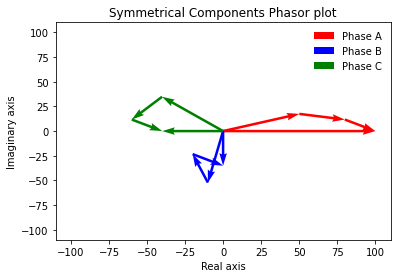

In [5]:
#Original unbalanced 3-phase vector plot
fig,ax=plt.subplots()
ax.quiver(0, 0, unbalanced[0].real, unbalanced[0].imag, color="red", 
          scale_units="xy", 
          angles="xy", 
          scale=1, 
          label="Phase A")
ax.quiver(0, 0, unbalanced[1].real, unbalanced[1].imag, color="blue", 
          scale_units="xy",
          angles="xy",
          scale=1, 
          label="Phase B")
ax.quiver(0, 0, unbalanced[2].real, unbalanced[2].imag, color="green",
          scale_units="xy",
          angles="xy",
          scale=1, 
          label="Phase C")
# Phase A symmetrical components plot
ax.quiver(0,0,Va_pos.real, Va_pos.imag, scale_units="xy", 
          angles="xy", scale=1, color="red")
ax.quiver(Va_pos.real,Va_pos.imag,Va_neg.real, Va_neg.imag, scale_units="xy", 
          angles="xy", scale=1, color="red")
ax.quiver(Va_pos.real+Va_neg.real,Va_pos.imag+Va_neg.imag,Va_zero.real, Va_zero.imag, scale_units="xy", 
          angles="xy", scale=1, color="red")
# Phase B symmetrical components plot
ax.quiver(0,0,Vb_pos.real, Vb_pos.imag, scale_units="xy", 
          angles="xy", scale=1, color="blue")
ax.quiver(Vb_pos.real,Vb_pos.imag,Vb_neg.real, Vb_neg.imag, scale_units="xy", 
          angles="xy", scale=1, color="blue")
ax.quiver(Vb_pos.real+Vb_neg.real,Vb_pos.imag+Vb_neg.imag,Vb_zero.real, Vb_zero.imag, scale_units="xy", 
          angles="xy", scale=1, color="blue")
# Phase C symmetrical components plot
ax.quiver(0,0,Vc_pos.real, Vc_pos.imag, scale_units="xy", 
          angles="xy", scale=1, color="green")
ax.quiver(Vc_pos.real,Vc_pos.imag,Vc_neg.real, Vc_neg.imag, scale_units="xy", 
          angles="xy", scale=1, color="green")
ax.quiver(Vc_pos.real+Vc_neg.real,Vc_pos.imag+Vc_neg.imag,Vc_zero.real, Vc_zero.imag, scale_units="xy", 
          angles="xy", scale=1, color="green")
 

max_lim=np.abs(unbalanced).max()
ax.set_xlim(-1.1*max_lim, 1.1*max_lim)
ax.set_ylim(-1.1*max_lim, 1.1*max_lim)
ax.set_xlabel("Real axis")
ax.set_ylabel("Imaginary axis")
ax.set_title("Symmetrical Components Phasor plot")
plt.legend(frameon=False)